# Thermocouple calibration 
This code would fit your measured Seebeck voltage (in $\mu$V) at several different temperatures between 0 $^O$C and 100$^O$C to a ninth order polynomial (coefficients C$_{0}$ to C$_{9}$, denoted as C0 to C9 in the codes below) and two other parameters $\alpha_{o}$ and $\alpha_{1}$. More details may be found in the ITS-90 document on thermocouple calibration and in *Tcalibrev1.pdf* in the Temperature and Calibration Module on the Canvas course page.<br />

#### **Direct Calibration**
The direct equation (Independent variable: Temperature, T in $^{O}$C,  Dependent variable: Seebeck voltage, $E, \mu$V) you will apply to calibrate a K-type thermocouple in the range 0 $^{o}$C to 1372 $^{o}$C is:

$$\large E=\sum_{i=0}^{9}C_{i}T^{i} + \alpha_{0} e ^{[\alpha_{1}(T-126.9686)^2]}$$ <br />
**For convenience, the coefficients $\alpha_{0}=1.185976\times10^{2}$ and $\alpha_{1}=-1.83432\times10^{-4}$ are specified in the codes below if the number of data points is between 10 and 15. If you have more than 15 data points, coefficients $\alpha_{0}$ and $\alpha_{1}$ can be extracted from the fit as well and do not have to specified}**. <br />

A sample curve fit and the resulting parameters are given below. The code also plots the measured data and the proposed curve. <br />
You have downloaded this Python Notebook into your JupyterNotebook environment from GitHub. Also export your Excel file with Seebeck vs T data into the same environment.

### Codes for Direct Calibration

parameters C0 to C9 from curve fit [ 7.15444941e+01  2.18454094e+02 -3.51552860e+01  2.68513793e+00
 -1.09202494e-01  2.62699507e-03 -3.86159929e-05  3.40728419e-07
 -1.65705412e-09  3.41228903e-12]
covariance matrix from curve fit [[ 1.98090992e+03 -7.58825202e+02  1.04754067e+02 -7.21436601e+00
   2.83002272e-01 -6.72062280e-03  9.83452300e-05 -8.66482183e-07
   4.21324098e-09 -8.68270302e-12]
 [-7.58825202e+02  1.22993914e+03 -2.64887399e+02  2.31341690e+01
  -1.05455130e+00  2.77854470e-02 -4.38784446e-04  4.09760509e-06
  -2.08586011e-08  4.46031236e-11]
 [ 1.04754067e+02 -2.64887399e+02  6.23509793e+01 -5.71244159e+00
   2.68579385e-01 -7.23284921e-03  1.16096740e-04 -1.09795579e-06
   5.64568618e-09 -1.21721666e-11]
 [-7.21436601e+00  2.31341690e+01 -5.71244159e+00  5.38817774e-01
  -2.58556633e-02  7.06997890e-04 -1.14837954e-05  1.09643039e-07
  -5.68192850e-10  1.23300945e-12]
 [ 2.83002272e-01 -1.05455130e+00  2.68579385e-01 -2.58556633e-02
   1.25960062e-03 -3.48497836e-05 

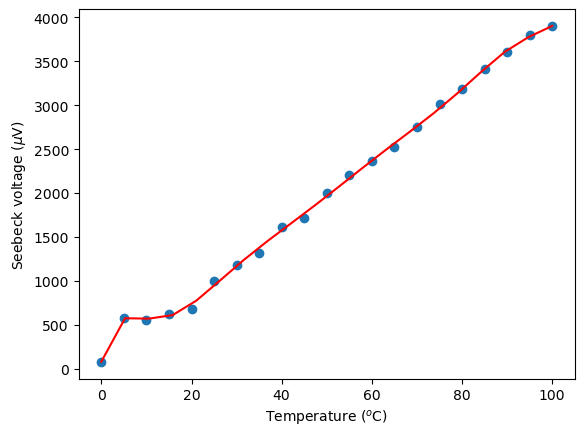

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
columns = ["T", "V"]
TCdata_in = pd.read_excel('TCKG2.xlsx', usecols=columns)#read excel xlxs file into a Pandas dataframe named TCdata_in
xdata = TCdata_in["T"]
ydata = TCdata_in["V"]
#define the direct calibration equation as a function funcD
def funcD(T, C0, C1, C2, C3, C4, C5, C6, C7, C8, C9):
    return 1.185976e2*np.exp(-1.83432e-4*(T-126.9686)**2)+(C0 +(C1*T)+(C2*T**2)+(C3*T**3)+(C4*T**4)+(C5*T**5)+(C6*T**6)+(C7*T**7)+(C8*T**8)+(C9*T**9))

popt, pcov = curve_fit(funcD, xdata, ydata, p0=[-1e1, 3.9e1,2e-2,-10e-5,3e-7,-6e-10,6e-13,-3e-16,10e-20,-1e-23])#initial guess for C0 to C9 provided
print("parameters C0 to C9 from curve fit", popt)
print("covariance matrix from curve fit", pcov)
p_sigma = np.sqrt(np.diag(pcov))
print("standard deviations in the coefficients C0 to C9", p_sigma)
C0opt,C1opt,C2opt, C3opt,C4opt,C5opt,C6opt,C7opt,C8opt,C9opt = popt #pickout the optimal parameters
#plot the model data and the measured data
x_model = np.linspace(min(xdata), max(xdata), 20)
y_model = funcD(x_model, C0opt,C1opt,C2opt,C3opt,C4opt,C5opt,C6opt,C7opt,C8opt,C9opt)
plt.scatter(xdata, ydata)
plt.plot(x_model, y_model, color= 'r')
plt.xlabel("Temperature ($^{o}$C)")
plt.ylabel("Seebeck voltage ($\mu$V)")
plt.show()

##### Compare the coefficients $C_{0}$ to $C_{9}$ you have obtained for Direct Calibration with what the ITS-90 prescribes. Inlcude this in your lab report<br />

### Codes for Indirect Calibration

#### **Indirect Calibration**
The indirect calibration (Independent variable: Seebeck voltage ($\mu$V), Dependent variable: Temperature (in $\deg ^{O}$C) is:
 $$\large T = \sum_{i=0}^{9}a_{i}E^{i}$$ <br />
**You do not have to perform the Indirect Calibration**. But use one of the voltage values you have measured to calculate the corresponding temperature. Use the code below under Indirect Calibration. The coefficients $a_{0} to a_{9}$ are provided below.

In [20]:
import numpy as np
E = np.array([0, 100, 500, 2000, 3500])#Measured Seebeck voltage in micro volts
#calculate temperature using inverse calibration
T = (0*E)+(2.508355e-2*E)+(7.860106e-8*E**2)+(-2.503131e-10*E**3)+(8.315270e-14*E**4)+(-1.228034e-17*E**5)+(9.804036e-22*E**6)+(-4.413030e-26*E**7)+(1.057734e-30*E**8)+(-1.052755e-35*E**9)
print("Seebeck voltage", E,"microV","    and corresponding temperature", T,"deg C")

Seebeck voltage [   0  100  500 2000 3500] microV     and corresponding temperature [ 0.          2.50889889 12.53496438 49.42496191 84.04506783] deg C


##### Compare the temperatures the Indirect Calibration returns with what your thermometer actually measured at that value for E. Calculate the percentage error with respect to the values for T calculated above. Include this in your lab report.